# Imports

In [1]:
%%capture
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, LeaveOneOut, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats
from scipy.stats import ttest_rel, wilcoxon

# Questão 1

In [3]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

labels = iris.target_names
shape_x = iris_X.shape
shape_y = iris_y.shape

print(f"Labels: {labels}")
print(f"Shape of X: {shape_x}")
print(f"Shape of y: {shape_y}")

print(f"X:\n{iris_X[:15]}")
print(f"y:\n{iris_y[:15]}")

Labels: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Shape of y: (150,)
X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]]
y:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Questão 2

In [4]:
def class_distribution(y):
    labels = np.unique(y)
    amount = len(y)

    distribution = {}

    for label in labels:
        count = np.sum(y == label)
        distribution[int(label)] = round(float(count / amount), 3)

    return distribution
    
distribution = class_distribution(iris_y)
print(f"Class distribution: {distribution}")

Class distribution: {0: 0.333, 1: 0.333, 2: 0.333}


# Questão 3

In [5]:
np.random.seed(42)

permuted_indices = np.random.permutation(iris_X.shape[0])

iris_X_test = iris_X[permuted_indices[:10]]
iris_y_test = iris_y[permuted_indices[:10]]
iris_X_train = iris_X[permuted_indices[10:]]
iris_y_train = iris_y[permuted_indices[10:]]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(iris_X_train, iris_y_train)

print(iris_y_test)
print(knn.predict(iris_X_test))

[1 0 2 1 1 0 1 2 1 1]
[1 0 2 1 1 0 1 2 1 1]


# Questão 4

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

print(f"Treino_X = {X_train.shape}, Treino_Y = {y_train.shape}")
print(f"Teste_X = {X_test.shape}, Teste_Y = {y_test.shape}")

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_test)
print(y_pred)

print (f"Accuracy = {knn.score(X_test, y_test)}")

Treino_X = (90, 4), Treino_Y = (90,)
Teste_X = (60, 4), Teste_Y = (60,)
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]
Accuracy = 0.9833333333333333


# Questão 5

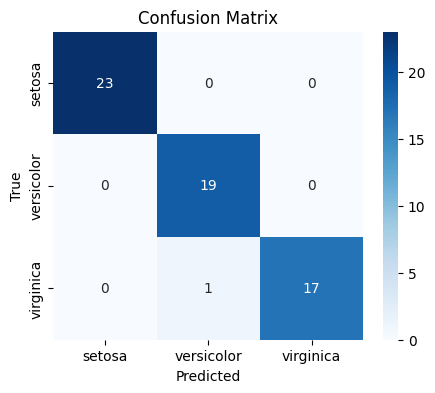

In [7]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, labels)

# Questão 6

In [8]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



# Questão 7

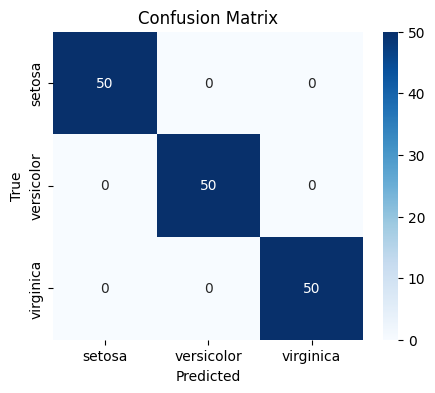

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(iris_X, iris_y)

y_test = iris_y
y_pred = knn.predict(iris_X)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, labels)

# Questão 8

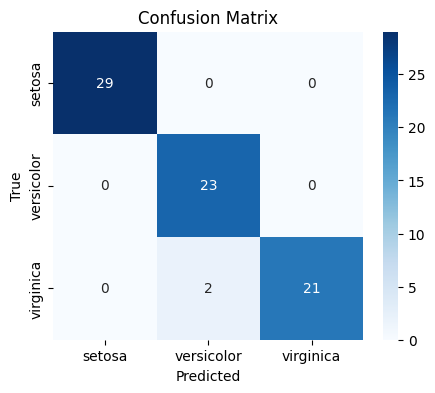

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.5, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, labels)

# Questão 9

Fold Accuracy: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]

Mean Accuracy: 0.96
Standard Deviation: 0.02
Accuracy Confidence Interval (95%): 0.94, 0.98


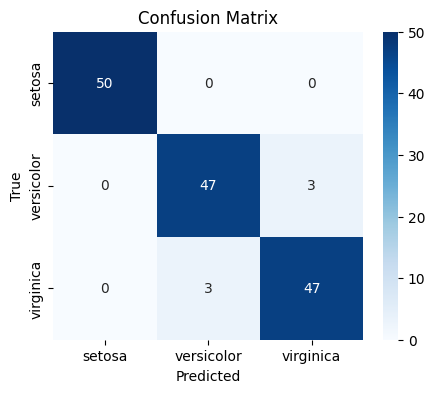

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, iris_X, iris_y, cv=5)

print(f"Fold Accuracy: {scores}\n")

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scores)))

print(f"Mean Accuracy: {mean:.2f}")
print(f"Standard Deviation: {std:.2f}")
print (f"Accuracy Confidence Interval (95%): {inf:.2f}, {sup:.2f}")

y_pred = cross_val_predict(knn, iris_X, iris_y, cv=5)

cm = confusion_matrix(iris_y, y_pred)
plot_confusion_matrix(cm, labels)

# Questão 10

In [12]:
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(knn, iris_X, iris_y, scoring=scorings, cv=5)

scores_acc = scores['test_accuracy']
print(f"Mean Accuracy: {scores_acc.mean():.2f}, Standard Deviation: {scores_acc.std():.2f}")

scores_prec = scores['test_precision_macro']
print(f"Mean Macro Precision: {scores_prec.mean():.2f}, Standard Deviation: {scores_prec.std():.2f}")

scores_rec = scores['test_recall_macro']
print(f"Mean Macro Recall: {scores_rec.mean():.2f}, Standard Deviation: {scores_rec.std():.2f}")

scores_f1 = scores['test_f1_macro']
print(f"Mean Macro F1: {scores_f1.mean():.2f}, Standard Deviation: {scores_f1.std():.2f}")

Mean Accuracy: 0.96, Standard Deviation: 0.02
Mean Macro Precision: 0.96, Standard Deviation: 0.02
Mean Macro Recall: 0.96, Standard Deviation: 0.02
Mean Macro F1: 0.96, Standard Deviation: 0.03


# Questão 11

In [13]:
loo = LeaveOneOut()
scores = cross_val_score(knn, iris_X, iris_y, cv=loo)

print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scores)))

print(f"\nMean Accuracy: {mean:.2f}, Standard Deviation: {std:.2f}")
print (f"Accuracy Confidence Interval (95%): {inf:.2f}, {sup:.2f}\n")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

Mean Accuracy: 0.96, Standard Deviation: 0.20
Accuracy Confidence Interval (95%): 0.93, 0.99



# Questão 12

In [14]:
kNN = KNeighborsClassifier()

grade = {'n_neighbors': [1, 3, 5]}

gs = GridSearchCV(estimator=kNN, param_grid = grade,
                  scoring='accuracy', cv = 10)

gs = gs.fit(iris_X, iris_y)

print("Best Mean Accuracy: %0.2f" % gs.best_score_)
print("Best Parameter Values: ", gs.best_params_)
print("Grid Search Result Infos: ", gs.cv_results_.keys())

print(gs.cv_results_['split1_test_score'][0])
print(gs.cv_results_['split7_test_score'])

parciais1 = np.array ([gs.cv_results_['split0_test_score'][0],
                       gs.cv_results_['split1_test_score'][0],
                       gs.cv_results_['split2_test_score'][0],
                       gs.cv_results_['split3_test_score'][0],
                       gs.cv_results_['split4_test_score'][0],
                       gs.cv_results_['split5_test_score'][0],
                       gs.cv_results_['split6_test_score'][0],
                       gs.cv_results_['split7_test_score'][0],
                       gs.cv_results_['split8_test_score'][0],
                       gs.cv_results_['split9_test_score'][0]])

parciais2 = np.array ([gs.cv_results_['split0_test_score'][1],
                       gs.cv_results_['split1_test_score'][1],
                       gs.cv_results_['split2_test_score'][1],
                       gs.cv_results_['split3_test_score'][1],
                       gs.cv_results_['split4_test_score'][1],
                       gs.cv_results_['split5_test_score'][1],
                       gs.cv_results_['split6_test_score'][1],
                       gs.cv_results_['split7_test_score'][1],
                       gs.cv_results_['split8_test_score'][1],
                       gs.cv_results_['split9_test_score'][1]])

parciais3 = np.array ([gs.cv_results_['split0_test_score'][2],
                       gs.cv_results_['split1_test_score'][2],
                       gs.cv_results_['split2_test_score'][2],
                       gs.cv_results_['split3_test_score'][2],
                       gs.cv_results_['split4_test_score'][2],
                       gs.cv_results_['split5_test_score'][2],
                       gs.cv_results_['split6_test_score'][2],
                       gs.cv_results_['split7_test_score'][2],
                       gs.cv_results_['split8_test_score'][2],
                       gs.cv_results_['split9_test_score'][2]])

print (parciais1)
print (parciais2)
print (parciais3)

print (parciais1.mean())
print (parciais2.mean())
print (parciais3.mean())

Best Mean Accuracy: 0.97
Best Parameter Values:  {'n_neighbors': 5}
Grid Search Result Infos:  dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
0.9333333333333333
[1. 1. 1.]
[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ]
[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.96
0.9666666666666666
0.9666666666666668


# Questão 13

In [15]:
data = load_iris()
X, y = data.data, data.target

param_grid = {'n_neighbors': [1, 3, 5]}
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=kNN, param_grid = param_grid, scoring='accuracy', cv = 4)
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)

scores_knn = cross_val_score(gs, X, y, scoring='accuracy', cv = rkf)

print (scores_knn)

mean = scores_knn.mean()
std = scores_knn.std()
inf, sup = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scores_knn)))

print()
print(f"Mean Accuracy: {mean:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"Accuracy Confidence Interval (95%): ({inf:.2f}, {inf:.2f})")

[0.96666667 0.96666667 1.         0.96666667 0.96666667 0.93333333
 0.96666667 1.         0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 0.93333333 0.93333333 0.93333333 0.96666667 0.96666667
 0.96666667 0.96666667 1.         0.93333333 1.         0.9
 1.         0.96666667 0.93333333 0.96666667 0.96666667 0.96666667]

Mean Accuracy: 0.96
Standard Deviation: 0.02
Accuracy Confidence Interval (95%): (0.95, 0.95)


# Questão 14

In [16]:
data = load_iris()
X, y = data.data, data.target

param_grid = {'max_depth': [2, 3],
              'min_samples_split': [2, 4]}

decisionTree = DecisionTreeClassifier()
gs = GridSearchCV(estimator=decisionTree, param_grid = param_grid, scoring='accuracy', cv = 4)
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)

scores_dt = cross_val_score(gs, X, y, scoring='accuracy', cv = rkf)

print (scores_dt)

mean = scores_dt.mean()
std = scores_dt.std()
inf, sup = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scores_dt)))

print()
print(f"Mean Accuracy: {mean:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"Accuracy Confidence Interval (95%): ({inf:.2f}, {inf:.2f})")

[0.96666667 0.9        0.9        0.96666667 0.93333333 0.96666667
 0.93333333 0.9        0.96666667 0.9        0.96666667 1.
 0.96666667 0.93333333 0.86666667 0.93333333 0.86666667 0.96666667
 0.93333333 0.96666667 0.93333333 1.         0.93333333 0.93333333
 0.9        0.93333333 0.96666667 0.93333333 1.         0.9       ]

Mean Accuracy: 0.94
Standard Deviation: 0.04
Accuracy Confidence Interval (95%): (0.93, 0.93)


# Questão 15

In [17]:
print('Paired T Test')
s, p = ttest_rel(scores_knn, scores_dt)
print("t: %0.2f p-value: %0.2f\n" % (s,p))


print ('Wilcoxon Test')
s, p = wilcoxon (scores_knn, scores_dt, method='approx')
print("w: %0.2f p-value: %0.2f\n" % (s,p))

Paired T Test
t: 2.66 p-value: 0.01

Wilcoxon Test
w: 51.00 p-value: 0.01

